<a href="https://colab.research.google.com/github/she-fa/speech-based-AD-diagnosis/blob/main/analysing_tda_feature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview

This code aims to analyse all of the TDA feature generated from giotto-tda from the dataset. For example, e.g. ```amplitude_betti_h0```. We intend to use TDA feature to improve the score in the pilot study. As the score is in the form of numerical score, we use a regression approach. Therefore, we will inspect which TDA features contribute to a high performance of the regression model.

Recalling the study, these dataset belongs to a pilot study which aiming to develop a measurement from a speech data. These developed measurements will be mentioned in this code as the detail measurements from the pilot study. As there are more than one measurements, there is a general score -- a mean of all of these measurements developed by the pilot study. In this code, this general score appear as ```Score``` in the dataframe.

# Code


In [1]:
# Importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_selection import RFE
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [2]:
# Uploading file from Computer
from google.colab import files
uploaded = files.upload()

Saving result_tda.tsv to result_tda.tsv


In [3]:
path = '/content/result_tda.tsv' # path for the result data
df = pd.read_csv(path, sep='\t')
df

,File,path,amplitude_bottleneck_h0,amplitude_wasserstein_h0,amplitude_betti_h0,amplitude_landscape_h0,amplitude_silhouette_h0,amplitude_heat_h0,amplitude_persistence_image_h0,complex_polynomial_R_h0,...,amplitude_silhouette_h1,amplitude_heat_h1,amplitude_persistence_image_h1,complex_polynomial_R_h1,complex_polynomial_S_h1,complex_polynomial_T_h1,persistence_entropy_h1,number_of_points_h1,Score,ID
0,P3.wav,/content/Sample P/P3.wav,335.179443,4749.595583,47446.89330,5010.121716,491.776237,226.939370,130.951157,0,...,72.352531,29.956924,26.804461,-171130680434,-85565340217,6.040774e+06,10.766084,2736,6.6,P3
1,P8.wav,/content/Sample P/P8.wav,4146.620117,58027.641810,147920.92440,218008.581500,22935.011540,13.743786,9.029027,0,...,4232.241726,1.839586,1.644614,-22626763075849,-11313381537924,-1.649603e+09,10.495954,2167,6.3,P8
2,P1.wav,/content/Sample P/P1.wav,1103.339600,16143.268600,108360.31750,29922.372290,2444.436947,88.214243,57.202729,0,...,375.219904,12.455660,10.893016,-2699694268535,-1349847134267,3.794870e+07,11.179076,3447,7.4,P1
3,P9.wav,/content/Sample P/P9 .wav,9366.868164,59009.541660,181272.46720,740156.956500,19912.501070,11.516630,12.410569,0,...,5380.367506,2.257968,1.913427,-29503969567190,-14751984783595,-4.385734e+08,10.661382,2485,7.1,P9
4,P7.wav,/content/Sample P/P7.wav,5023.588867,53382.575990,138674.34710,290705.566400,20709.664380,12.743393,9.141643,0,...,4268.039678,1.724704,1.862951,-18117913497168,-9058956748584,-1.049806e+09,10.339645,2043,6.2,P7
5,P2.wav,/content/Sample P/P2.wav,574.916504,8281.946257,73834.35182,11254.841350,937.331619,159.154285,104.563065,0,...,143.206573,23.563214,19.559996,-661111905438,-330555952719,6.493640e+06,11.107187,3262,8.2,P2
6,P6.wav,/content/Sample P/P6.wav,1696.084717,15883.266450,94996.13994,57030.020130,3608.162527,107.823436,74.992402,0,...,227.054517,17.730263,28.621454,-1706788544574,-853394272287,6.114052e+06,11.302737,4794,3.6,P6
7,P5.wav,/content/Sample P/P5.wav,930.918884,13805.172810,129074.75570,23189.958650,1536.165549,174.391607,116.025649,0,...,204.659260,28.273933,24.416220,-2661989374485,-1330994687242,-1.266349e+08,11.818985,5532,3.2,P5
8,P10.wav,/content/Sample P/P10.wav,2712.015869,58494.135280,249246.48860,115310.950900,14129.322380,39.178424,23.608694,0,...,2648.083164,4.654323,4.572296,-46346993963134,-23173496981567,2.838165e+09,11.587789,4939,7.4,P1
9,P4.wav,/content/Sample P/P4.wav,595.705872,9395.893770,76678.76731,11870.801280,1195.875547,150.098424,89.852649,0,...,191.770176,18.880457,17.546705,-814439305466,-407219652733,-3.484710e+07,10.991651,3277,6.4,P4


In [4]:
df.columns

Index(['File', 'path', 'amplitude_bottleneck_h0', 'amplitude_wasserstein_h0',
       'amplitude_betti_h0', 'amplitude_landscape_h0',
       'amplitude_silhouette_h0', 'amplitude_heat_h0',
       'amplitude_persistence_image_h0', 'complex_polynomial_R_h0',
       'complex_polynomial_S_h0', 'complex_polynomial_T_h0',
       'persistence_entropy_h0', 'number_of_points_h0',
       'amplitude_bottleneck_h1', 'amplitude_wasserstein_h1',
       'amplitude_betti_h1', 'amplitude_landscape_h1',
       'amplitude_silhouette_h1', 'amplitude_heat_h1',
       'amplitude_persistence_image_h1', 'complex_polynomial_R_h1',
       'complex_polynomial_S_h1', 'complex_polynomial_T_h1',
       'persistence_entropy_h1', 'number_of_points_h1', 'Score', 'ID'],
      dtype='object')

## Checking the  correlation between features and scores

Features are all features generated from the giotto-tda library. Scores related
to the general measurement scores from the pilot study.

<ipython-input-5-584076a400bd>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  spearmancorr = df.corr(method='spearman')


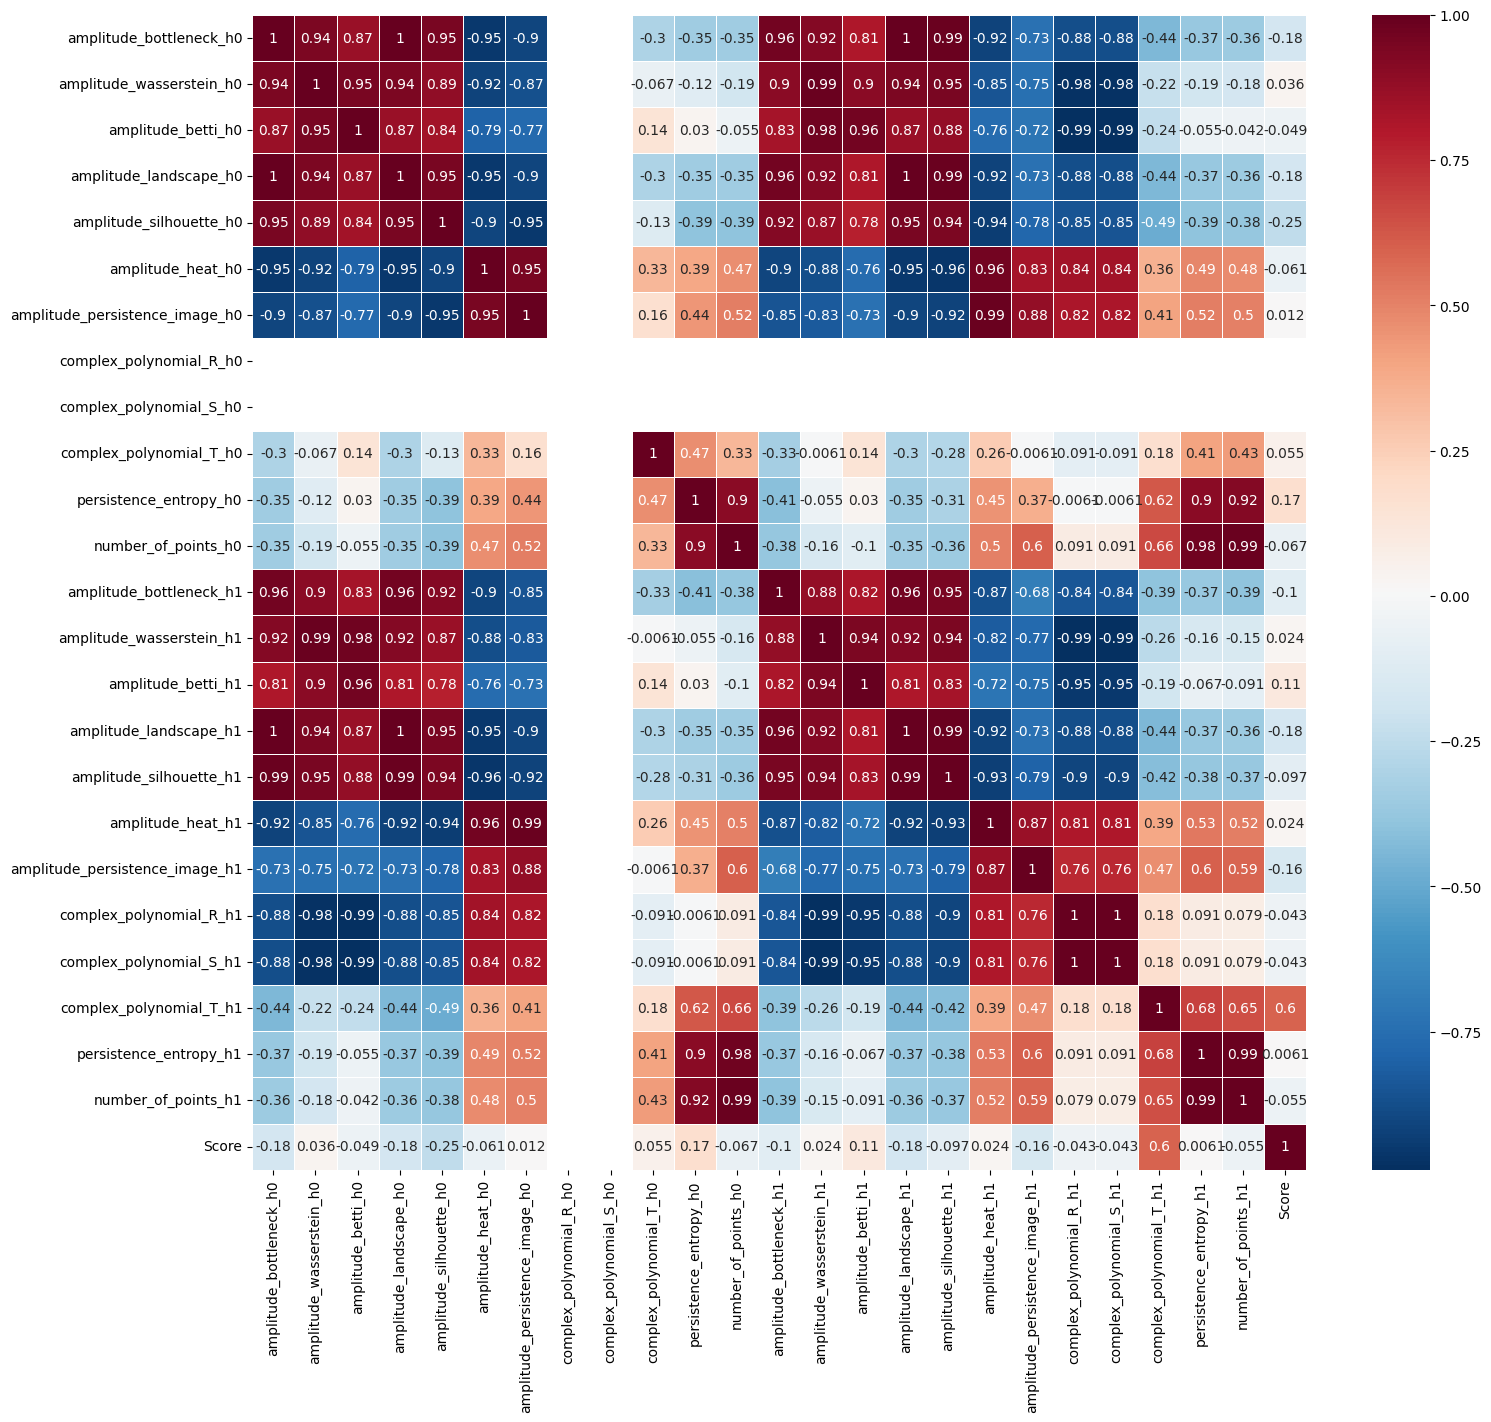

In [5]:
# Checking correlation between features and scores
fig, ax = plt.subplots(figsize=(17, 15))

spearmancorr = df.corr(method='spearman')
sns.heatmap(spearmancorr,
            xticklabels=spearmancorr.columns,
            yticklabels=spearmancorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5,
            ax = ax);

**Highest correlated feature (HCF) with the score is ```Complex_Polynomial_T_h1```, with correlation score of 0.6**.

This feature means coefficients of complex polynomials whose roots are obtained from points in persistence diagrams. The points in the persistence diagram are the birth-date pairs which computer from certain mapping. The mapping computation used in this feature is symbolised with T. Additionally, this feature belongs to the homology group of 1. More about the complex polynomial feature explanation is [here](https://giotto-ai.github.io/gtda-docs/latest/modules/generated/diagrams/features/gtda.diagrams.ComplexPolynomial.html#:~:text=Coefficients%20of%20complex%20polynomials%20whose%20roots%20are%20obtained%20from%20points%20in%20persistence%20diagrams).

## Checking the correlation between the best features with all of the measurement from the pilot study.

Best feature is the ```Complex_Polynomial_T_h1``` generated from correlation
calculation. All of the measurements mean the detail from the general measurement score of the pilot study. This implementation aims to see any connection between TDA features with any features in the pilot study.

In [10]:
# Uploading meta files consisting of detail measurement from the pilot study
uploaded = files.upload()

Saving metadata.csv to metadata.csv


In [11]:
path_meta = '/content/metadata.csv' # path for the metadata
df_meta = pd.read_csv(path_meta)
df_meta

,File,bit/sec,bit,sample,duration (s),file size (kb),sex,age,status,Score,...,PhSD_Rating,PhDriftr_Rating,OBD/Harm_Rating,ELowHarm_Rating,ESubHarm_Rating,HNR_Rating,HTilt_Rating,HarmtoNoiseRat,HarminicsTilt (%),OBD number
0,P1.wav,22050,16,134736,6.11,264,Kobieta,48,Zdrowa,7.4,...,6.0,6.4,5.7,10.0,5.9,8.9,9.1,34.3,0.9,32
1,P2.wav,22050,16,125022,5.67,173,Kobieta,48,Zdrowa,8.2,...,7.1,7.6,10.0,10.0,10.0,7.3,3.2,138.1,1.9,6
2,P3.wav,22050,16,108284,4.91,212,Kobieta,62,Zdrowa,6.6,...,7.3,6.0,2.9,8.5,10.0,9.9,10.0,40.3,-0.3,123
3,P4.wav,22050,16,133931,6.07,262,Mezcyzna,67,Zdrowy,6.4,...,5.5,6.9,10.0,9.6,4.9,8.9,10.0,34.3,0.2,8
4,P5.wav,22050,16,201228,9.13,394,Mezcyzna,86,MCI,3.2,...,6.1,5.9,0.0,6.0,3.8,2.8,3.4,5.1,1.9,263
5,P6.wav,22050,16,173853,7.88,340,Mezcyzna,82,Zaburzenia poznawcze na tle naczyniowym,3.6,...,3.9,5.1,0.0,9.1,3.8,4.5,1.8,12.6,3.4,166
6,P7.wav,22050,16,87014,3.95,170,Kobieta,79,Zdrowa,6.2,...,5.4,7.5,6.9,5.0,10.0,8.2,6.8,28.6,-1.4,21
7,P8.wav,22050,16,86000,3.90,169,Kobieta,13,Zdrowa,6.3,...,7.8,7.1,6.9,10.0,10.0,7.8,1.4,26.0,5.6,23
8,P9.wav,22050,16,104416,4.74,204,Kobieta,59,Zdrowa,7.1,...,7.5,6.9,6.3,10.0,8.2,7.4,2.4,23.7,2.2,33
9,P10.wav,22050,16,185652,8.42,363,Mezcyzna,71,Zdrowy,7.5,...,7.4,8.2,4.7,10.0,8.0,9.4,9.0,37.2,0.9,79


In [12]:
df_meta.columns

Index(['File', 'bit/sec', 'bit', 'sample', 'duration (s)', 'file size (kb)',
       'sex', 'age', 'status', 'Score', 'AmpSD_Rating', 'AmpSimmer_Rating',
       'AmpLead_Rating', 'FqSD_Rating', 'FqJitter_Rating', 'FqLead_Rating',
       'PhSD_Rating', 'PhDriftr_Rating', 'OBD/Harm_Rating', 'ELowHarm_Rating',
       'ESubHarm_Rating', 'HNR_Rating', 'HTilt_Rating', 'HarmtoNoiseRat',
       'HarminicsTilt (%)', 'OBD number'],
      dtype='object')

In [13]:
# Drop unused columns
# 'Score': becoming a duplicate
# 'bit/sec', 'bit', 'sample', 'duration (s)', 'file size (kb)','sex', 'status'
df_meta_drop = df_meta.drop(
    ['Score', 'bit/sec', 'bit', 'sample', 'duration (s)', 'file size (kb)',
     'sex', 'status'],
    axis=1, inplace=False)
df_meta_drop


,File,age,AmpSD_Rating,AmpSimmer_Rating,AmpLead_Rating,FqSD_Rating,FqJitter_Rating,FqLead_Rating,PhSD_Rating,PhDriftr_Rating,OBD/Harm_Rating,ELowHarm_Rating,ESubHarm_Rating,HNR_Rating,HTilt_Rating,HarmtoNoiseRat,HarminicsTilt (%),OBD number
0,P1.wav,48,4.2,7.0,8.3,7.8,8.6,7.7,6.0,6.4,5.7,10.0,5.9,8.9,9.1,34.3,0.9,32
1,P2.wav,48,6.1,7.9,10.0,9.4,9.2,8.4,7.1,7.6,10.0,10.0,10.0,7.3,3.2,138.1,1.9,6
2,P3.wav,62,1.7,5.6,3.7,7.2,7.5,5.1,7.3,6.0,2.9,8.5,10.0,9.9,10.0,40.3,-0.3,123
3,P4.wav,67,0.0,5.3,9.2,0.5,7.4,4.7,5.5,6.9,10.0,9.6,4.9,8.9,10.0,34.3,0.2,8
4,P5.wav,86,2.1,3.1,2.5,1.8,2.3,2.0,6.1,5.9,0.0,6.0,3.8,2.8,3.4,5.1,1.9,263
5,P6.wav,82,0.0,2.5,1.0,6.1,4.7,4.1,3.9,5.1,0.0,9.1,3.8,4.5,1.8,12.6,3.4,166
6,P7.wav,79,3.9,5.8,8.5,1.6,5.6,5.5,5.4,7.5,6.9,5.0,10.0,8.2,6.8,28.6,-1.4,21
7,P8.wav,13,1.3,5.9,7.0,3.9,7.6,5.1,7.8,7.1,6.9,10.0,10.0,7.8,1.4,26.0,5.6,23
8,P9.wav,59,7.3,8.7,7.7,4.9,9.4,5.3,7.5,6.9,6.3,10.0,8.2,7.4,2.4,23.7,2.2,33
9,P10.wav,71,4.4,6.6,8.1,8.2,7.8,6.3,7.4,8.2,4.7,10.0,8.0,9.4,9.0,37.2,0.9,79


In [14]:
# Merge 2 Dataframes
df_merge = df.set_index('File').join(df_meta_drop.set_index('File'), on='File')
df_merge

,path,amplitude_bottleneck_h0,amplitude_wasserstein_h0,amplitude_betti_h0,amplitude_landscape_h0,amplitude_silhouette_h0,amplitude_heat_h0,amplitude_persistence_image_h0,complex_polynomial_R_h0,complex_polynomial_S_h0,...,PhSD_Rating,PhDriftr_Rating,OBD/Harm_Rating,ELowHarm_Rating,ESubHarm_Rating,HNR_Rating,HTilt_Rating,HarmtoNoiseRat,HarminicsTilt (%),OBD number
File,,,,,,,,,,,,,,,,,,,,,
P3.wav,/content/Sample P/P3.wav,335.179443,4749.595583,47446.89330,5010.121716,491.776237,226.939370,130.951157,0,0,...,7.3,6.0,2.9,8.5,10.0,9.9,10.0,40.3,-0.3,123
P8.wav,/content/Sample P/P8.wav,4146.620117,58027.641810,147920.92440,218008.581500,22935.011540,13.743786,9.029027,0,0,...,7.8,7.1,6.9,10.0,10.0,7.8,1.4,26.0,5.6,23
P1.wav,/content/Sample P/P1.wav,1103.339600,16143.268600,108360.31750,29922.372290,2444.436947,88.214243,57.202729,0,0,...,6.0,6.4,5.7,10.0,5.9,8.9,9.1,34.3,0.9,32
P9.wav,/content/Sample P/P9 .wav,9366.868164,59009.541660,181272.46720,740156.956500,19912.501070,11.516630,12.410569,0,0,...,7.5,6.9,6.3,10.0,8.2,7.4,2.4,23.7,2.2,33
P7.wav,/content/Sample P/P7.wav,5023.588867,53382.575990,138674.34710,290705.566400,20709.664380,12.743393,9.141643,0,0,...,5.4,7.5,6.9,5.0,10.0,8.2,6.8,28.6,-1.4,21
P2.wav,/content/Sample P/P2.wav,574.916504,8281.946257,73834.35182,11254.841350,937.331619,159.154285,104.563065,0,0,...,7.1,7.6,10.0,10.0,10.0,7.3,3.2,138.1,1.9,6
P6.wav,/content/Sample P/P6.wav,1696.084717,15883.266450,94996.13994,57030.020130,3608.162527,107.823436,74.992402,0,0,...,3.9,5.1,0.0,9.1,3.8,4.5,1.8,12.6,3.4,166
P5.wav,/content/Sample P/P5.wav,930.918884,13805.172810,129074.75570,23189.958650,1536.165549,174.391607,116.025649,0,0,...,6.1,5.9,0.0,6.0,3.8,2.8,3.4,5.1,1.9,263
P10.wav,/content/Sample P/P10.wav,2712.015869,58494.135280,249246.48860,115310.950900,14129.322380,39.178424,23.608694,0,0,...,7.4,8.2,4.7,10.0,8.0,9.4,9.0,37.2,0.9,79


In [15]:
df_merge.columns

Index(['path', 'amplitude_bottleneck_h0', 'amplitude_wasserstein_h0',
       'amplitude_betti_h0', 'amplitude_landscape_h0',
       'amplitude_silhouette_h0', 'amplitude_heat_h0',
       'amplitude_persistence_image_h0', 'complex_polynomial_R_h0',
       'complex_polynomial_S_h0', 'complex_polynomial_T_h0',
       'persistence_entropy_h0', 'number_of_points_h0',
       'amplitude_bottleneck_h1', 'amplitude_wasserstein_h1',
       'amplitude_betti_h1', 'amplitude_landscape_h1',
       'amplitude_silhouette_h1', 'amplitude_heat_h1',
       'amplitude_persistence_image_h1', 'complex_polynomial_R_h1',
       'complex_polynomial_S_h1', 'complex_polynomial_T_h1',
       'persistence_entropy_h1', 'number_of_points_h1', 'Score', 'ID', 'age',
       'AmpSD_Rating', 'AmpSimmer_Rating', 'AmpLead_Rating', 'FqSD_Rating',
       'FqJitter_Rating', 'FqLead_Rating', 'PhSD_Rating', 'PhDriftr_Rating',
       'OBD/Harm_Rating', 'ELowHarm_Rating', 'ESubHarm_Rating', 'HNR_Rating',
       'HTilt_Rating', 'H

In [16]:
# reorder the columns
df_merge = df_merge[['Score','path', 'amplitude_bottleneck_h0',
        'amplitude_wasserstein_h0',
       'amplitude_betti_h0', 'amplitude_landscape_h0',
       'amplitude_silhouette_h0', 'amplitude_heat_h0',
       'amplitude_persistence_image_h0', 'complex_polynomial_R_h0',
       'complex_polynomial_S_h0', 'complex_polynomial_T_h0',
       'persistence_entropy_h0', 'number_of_points_h0',
       'amplitude_bottleneck_h1', 'amplitude_wasserstein_h1',
       'amplitude_betti_h1', 'amplitude_landscape_h1',
       'amplitude_silhouette_h1', 'amplitude_heat_h1',
       'amplitude_persistence_image_h1', 'complex_polynomial_R_h1',
       'complex_polynomial_S_h1', 'complex_polynomial_T_h1',
       'persistence_entropy_h1', 'number_of_points_h1', 'ID', 'age',
       'AmpSD_Rating', 'AmpSimmer_Rating', 'AmpLead_Rating', 'FqSD_Rating',
       'FqJitter_Rating', 'FqLead_Rating', 'PhSD_Rating', 'PhDriftr_Rating',
       'OBD/Harm_Rating', 'ELowHarm_Rating', 'ESubHarm_Rating', 'HNR_Rating',
       'HTilt_Rating', 'HarmtoNoiseRat', 'HarminicsTilt (%)', 'OBD number']]

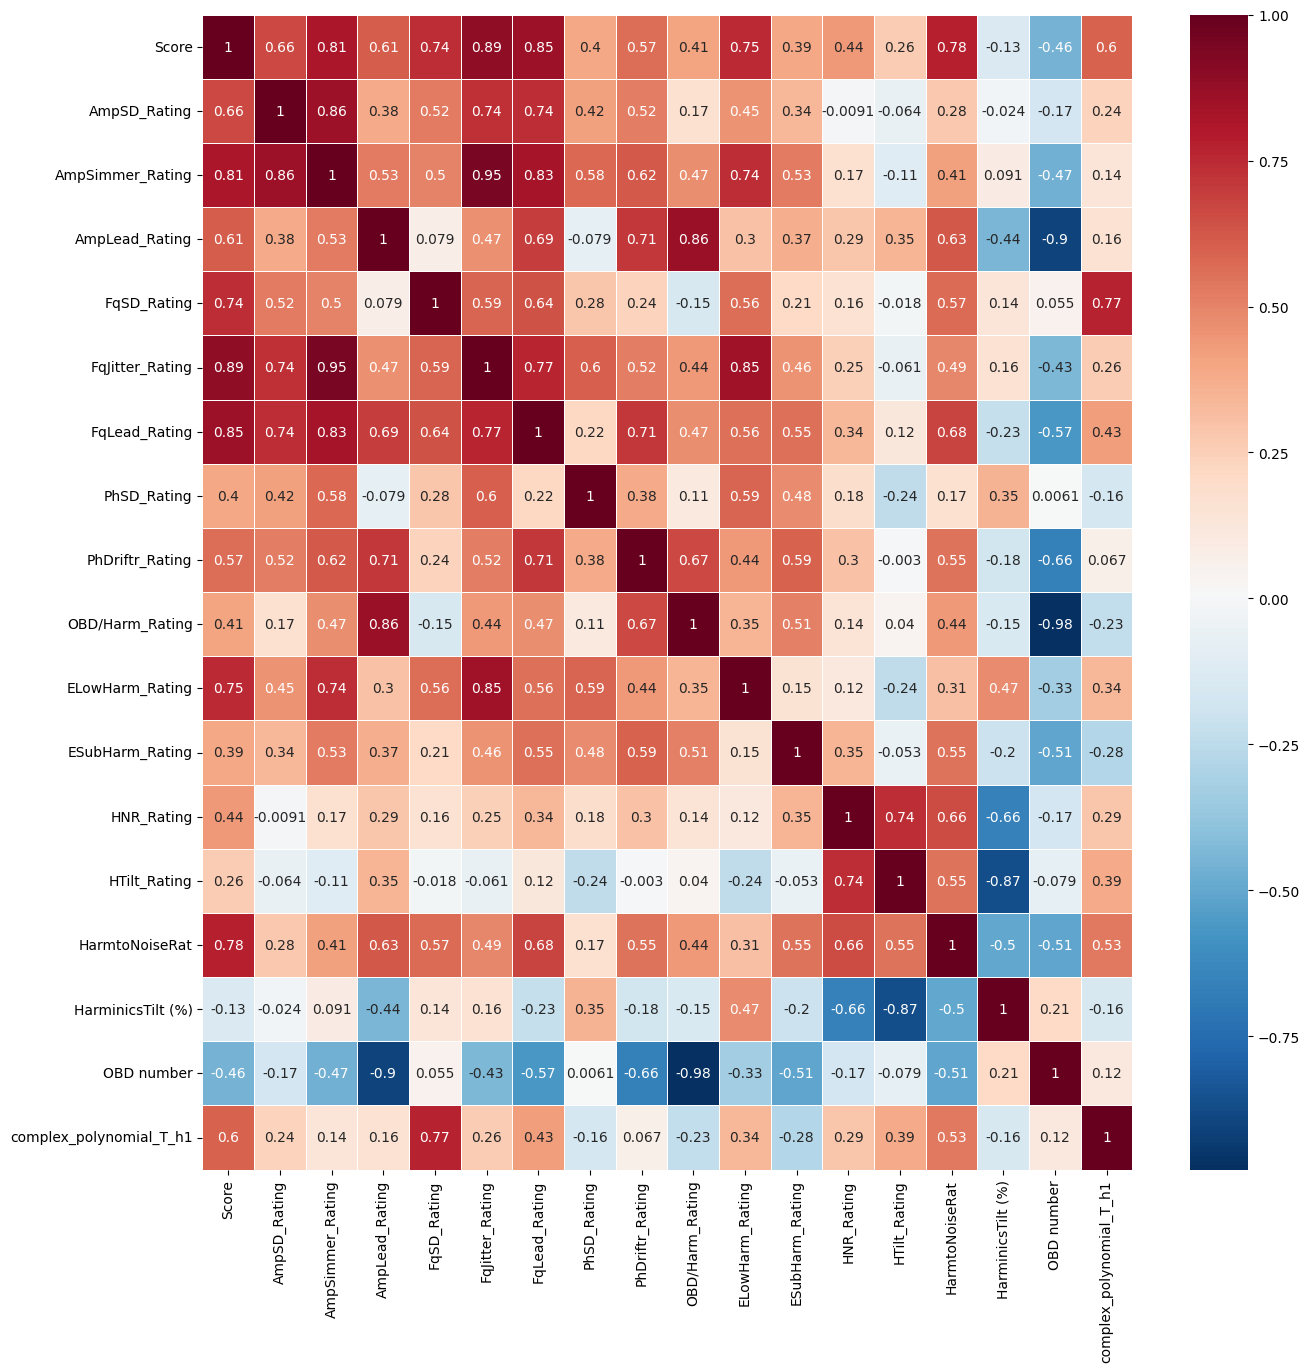

In [17]:
# Checking correlation between complex polynomial T h1 with other ratings
df_best_tda = df_merge[['Score','AmpSD_Rating', 'AmpSimmer_Rating', 'AmpLead_Rating', 'FqSD_Rating',
       'FqJitter_Rating', 'FqLead_Rating', 'PhSD_Rating', 'PhDriftr_Rating',
       'OBD/Harm_Rating', 'ELowHarm_Rating', 'ESubHarm_Rating', 'HNR_Rating',
       'HTilt_Rating', 'HarmtoNoiseRat', 'HarminicsTilt (%)', 'OBD number', 'complex_polynomial_T_h1']]

fig, ax = plt.subplots(figsize=(15, 15))
spearmancorr_best_tda = df_best_tda.corr(method='spearman')
sns.heatmap(spearmancorr_best_tda,
            xticklabels=spearmancorr_best_tda.columns,
            yticklabels=spearmancorr_best_tda.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5,
            ax = ax);

Highest correlated feature (HCF) with the score is ```Complex_Polynomial_T_h1```

**Highest correlated feature between the HCF and the detail measurement is ```FqSD_Rating```, with correlation score of 0.77**.

The ```FqSD_Rating```is a detail measurement from the pilot study which related to standard deviation of frequency.

## Regression Model with the baseline features

In [18]:
# CREATING REGRESSION PIPELINE
regr = make_pipeline(StandardScaler(), SVR(C=1.0,
                                           epsilon=0.1,
                                           kernel='rbf'
                                           ))
# ^-- StandardScaler()
# helps to scale the feature to mean=0 and std=1

# taking only features of interest
X = df_merge[['AmpSD_Rating', 'AmpSimmer_Rating', 'AmpLead_Rating', 'FqSD_Rating',
       'FqJitter_Rating', 'FqLead_Rating', 'PhSD_Rating', 'PhDriftr_Rating',
       'OBD/Harm_Rating', 'ELowHarm_Rating', 'ESubHarm_Rating', 'HNR_Rating',
       'HTilt_Rating', 'HarmtoNoiseRat', 'HarminicsTilt (%)', 'OBD number']]
y = df_merge[['Score']]

# splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

# fitting the model
regr.fit(X_train, y_train.values.ravel())

# predicting the test data
y_pred = regr.predict(X_test)

# evaluating the model using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.08485785999931798


## Regression Model with the HCF

In [19]:
# Taking only ONE best feature according to correlation
# 1st (0.6) Complex_polynomial_T_h1
# 2nd (0.17) Persistence)entropy_h0


# CREATING REGRESSION PIPELINE
regr = make_pipeline(StandardScaler(), SVR(C=1.0,
                                           epsilon=0.1,
                                           kernel='rbf'
                                           ))
# ^-- StandardScaler()
# helps to scale the feature to mean=0 and std=1

# taking only features of interest
X = df[['complex_polynomial_T_h1']]
y = df[['Score']]

# splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

# fitting the model
regr.fit(X_train, y_train.values.ravel())

# predicting the test data
y_pred = regr.predict(X_test)

# evaluating the model using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.33505654163740994


## Regression Model with 2 highest correlated features

The two highest correlated features are following:

the bracket is the correlation score
1. ```Complex_polynomial_T_h1``` (0.6)
2. ```Persistence_entropy_h0``` (0.17)

In [20]:
# Taking only TWO best feature according to correlation
# 1st (0.6) Complex_polynomial_T_h1
# 2nd (0.17) Persistence_entropy_h0


# CREATING REGRESSION PIPELINE
regr = make_pipeline(StandardScaler(), SVR(C=1.0,
                                           epsilon=0.1,
                                           kernel='rbf'
                                           ))
# ^-- StandardScaler()
# helps to scale the feature to mean=0 and std=1

# taking only features from amplitude
X = df[['complex_polynomial_T_h1', 'persistence_entropy_h0' ]]
y = df[['Score']]

# splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# fitting the model
regr.fit(X_train, y_train.values.ravel())

# predicting the test data
y_pred = regr.predict(X_test)

# evaluating the model using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.6724493254936608


# Summary

* The highest correlated feature (HCF) between all TDA features with the general score is ```Complex_polynomial_T_h1``` with a correlation score 0.6
* When investigating further correlation between HCF with all details of measurement in the pilot study, the highest correlation belongs to ```FqSD_Rating```.  ```FqSD_Rating``` is a rating developed in the pilot study
* Implementing a basic regression model with only 1 highest correlated feature (```Complex_polynomial_T_h1```) resulting a MSE of 0.335
* Implementing a basic regression model with 2 highest correlated features (```Complex_polynomial_T_h1``` and ```Persistence_entropy_h0```) resulting a MSE of 0.672
* The best regression model is with only 1 highest correlated feature (MSE  0.335). However, the MSE score is still higher than the baseline score (0.08485785999931798) indicating the performance is still lower than the standard performance.
